In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
movie_data = pd.read_csv("movies.dat",sep='::',engine='python', encoding='latin1')
movie_data.columns=['MovieID','MovieName','Genres']
movie_data.dropna(inplace=True)
movie_data.head()

,MovieID,MovieName,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [11]:
movie_data.shape

(3882, 3)

In [12]:
rating_data= pd.read_csv('ratings.dat', sep='::',engine='python', encoding='latin1')

rating_data.columns=['ID','MovieID','Ratings','Timestamp']
rating_data.dropna(inplace=True)     

rating_data.head()
     

,ID,MovieID,Ratings,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [13]:
rating_data.shape

(1000208, 4)

In [14]:
user_data= pd.read_csv('users.dat', sep='::',engine='python', encoding='latin1')
user_data.columns=['UserID','Gender','Age','category','Zip-code']
user_data.dropna(inplace=True)
user_data.head()
     


,UserID,Gender,Age,category,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [15]:
user_data.shape

(6039, 5)

In [16]:
dataset=pd.concat([movie_data,rating_data,user_data],axis=1)
dataset.head()

,MovieID,MovieName,Genres,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,category,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [17]:
dataset.shape


(1000208, 12)

In [18]:
dataset.isnull().sum()

MovieID      996326
MovieName    996326
Genres       996326
ID                0
MovieID           0
Ratings           0
Timestamp         0
UserID       994169
Gender       994169
Age          994169
category     994169
Zip-code     994169
dtype: int64

In [19]:
unique_genres=dataset['Genres'].unique()
print("unique_genres:",unique_genres)

unique_genres: ["Adventure|Children's|Fantasy" 'Comedy|Romance' 'Comedy|Drama' 'Comedy'
 'Action|Crime|Thriller' "Adventure|Children's" 'Action'
 'Action|Adventure|Thriller' 'Comedy|Drama|Romance' 'Comedy|Horror'
 "Animation|Children's" 'Drama' 'Action|Adventure|Romance'
 'Drama|Thriller' 'Drama|Romance' 'Thriller' 'Action|Comedy|Drama'
 'Crime|Drama|Thriller' 'Drama|Sci-Fi' 'Romance' 'Adventure|Sci-Fi'
 'Adventure|Romance' "Children's|Comedy|Drama" 'Documentary' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure' 'Crime|Thriller'
 "Animation|Children's|Musical|Romance" 'Action|Drama|Thriller'
 "Children's|Comedy" 'Drama|Mystery' 'Sci-Fi|Thriller'
 'Action|Comedy|Crime|Horror|Thriller' 'Drama|Musical'
 'Crime|Drama|Romance' 'Adventure|Drama' 'Action|Thriller'
 "Adventure|Children's|Comedy|Musical" 'Action|Drama|War'
 'Action|Adventure|Crime' 'Crime' 'Drama|Mystery|Romance' 'Action|Drama'
 'Drama|Romance|War' 'Horror' 'Action|Adventure|Comedy|Crime' 'Comedy|War'
 'Action|Adventure|Myst

In [20]:
dataset.drop_duplicates(inplace=True)


In [21]:
attributes=["MovieName","Genres","Gender","Age","Ratings"]
dataset.dropna(subset=attributes,inplace=True)
missing_value=dataset.isna().sum()
print(missing_value)

MovieID      0
MovieName    0
Genres       0
ID           0
MovieID      0
Ratings      0
Timestamp    0
UserID       0
Gender       0
Age          0
category     0
Zip-code     0
dtype: int64


In [22]:
dataset

,MovieID,MovieName,Genres,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,category,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
...,...,...,...,...,...,...,...,...,...,...,...,...
3877,3948.0,Meet the Parents (2000),Comedy,28,334,4,978125960,3879.0,M,25.0,3.0,83687
3878,3949.0,Requiem for a Dream (2000),Drama,28,266,2,978982323,3880.0,M,25.0,7.0,54942
3879,3950.0,Tigerland (2000),Drama,28,2174,3,978126491,3881.0,M,18.0,2.0,44515
3880,3951.0,Two Family House (2000),Drama,28,912,5,978985294,3882.0,M,56.0,14.0,55337


In [23]:
top_rated_movies=dataset[["MovieName","Ratings"]]
print(top_rated_movies)

                               MovieName  Ratings
0                         Jumanji (1995)        3
1                Grumpier Old Men (1995)        3
2               Waiting to Exhale (1995)        4
3     Father of the Bride Part II (1995)        5
4                            Heat (1995)        3
...                                  ...      ...
3877             Meet the Parents (2000)        4
3878          Requiem for a Dream (2000)        2
3879                    Tigerland (2000)        3
3880             Two Family House (2000)        5
3881               Contender, The (2000)        4

[3882 rows x 2 columns]


#### DATA VISUALIZATION

<Axes: xlabel='Gender', ylabel='count'>

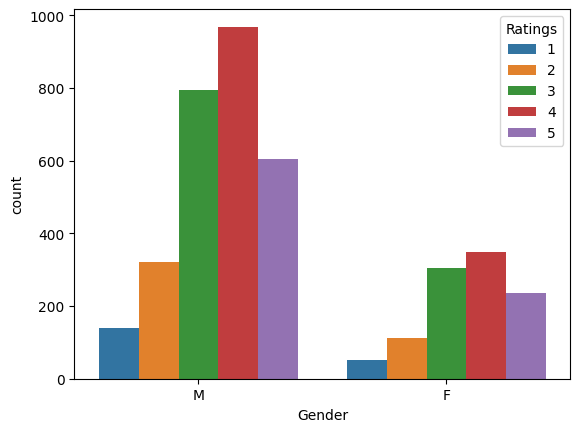

In [24]:
sns.countplot(x=dataset['Gender'],hue=dataset['Ratings'])

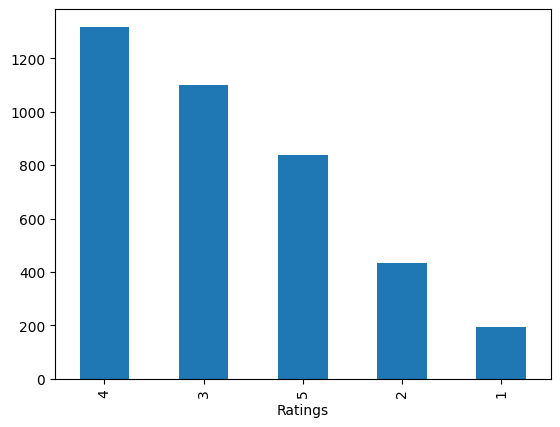

In [25]:
dataset['Ratings'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Age', ylabel='count'>

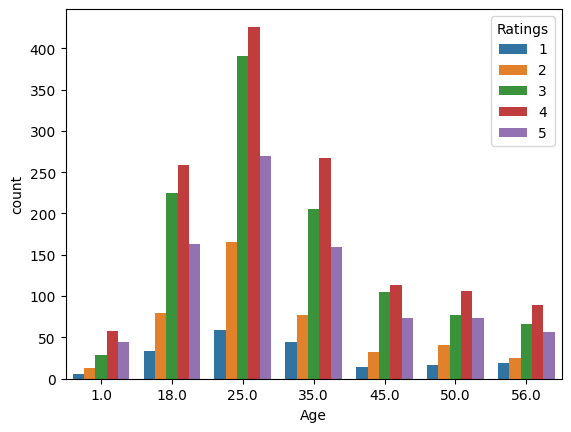

In [26]:
sns.countplot(x=dataset['Age'],hue=dataset['Ratings'])

In [27]:
dataset.head()


,MovieID,MovieName,Genres,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,category,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [28]:
x=dataset.drop(["MovieName","Genres","MovieID","Timestamp","Zip-code","Ratings","Gender"],axis=1)
y=dataset["Ratings"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [29]:
scaler=MinMaxScaler()
scaler_data=scaler.fit_transform(x)
scaled_df=pd.DataFrame(scaler_data,columns=x.columns)
scaled_df.head()
     

,ID,UserID,Age,category
0,0.0,0.000000,1.000000,0.80
1,0.0,0.000258,0.436364,0.75
2,0.0,0.000515,0.800000,0.35
3,0.0,0.000773,0.436364,1.00
4,0.0,0.001031,0.890909,0.45


 #### LOGISTIC REGRESSION

In [30]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [31]:
predictions=logmodel.predict(x_test)
     

In [32]:
classification_report(y_test,predictions)
     

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        40\n           2       0.00      0.00      0.00        75\n           3       0.29      0.26      0.27       210\n           4       0.35      0.78      0.48       263\n           5       0.00      0.00      0.00       189\n\n    accuracy                           0.33       777\n   macro avg       0.13      0.21      0.15       777\nweighted avg       0.20      0.33      0.24       777\n'

In [33]:
confusion_matrix(y_test,predictions)

array([[  0,   0,  14,  26,   0],
       [  0,   0,  23,  52,   0],
       [  0,   0,  55, 155,   0],
       [  0,   0,  58, 205,   0],
       [  0,   0,  42, 147,   0]], dtype=int64)

In [34]:
accuracy_score(y_test,predictions)

0.33462033462033464

#### KNEIGHBORS CLASSIFIER

In [35]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
predictions=knn_model.predict(x_test)

In [37]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       0.15      0.07      0.10        40\n           2       0.14      0.15      0.14        75\n           3       0.31      0.41      0.35       210\n           4       0.38      0.41      0.39       263\n           5       0.32      0.19      0.24       189\n\n    accuracy                           0.31       777\n   macro avg       0.26      0.25      0.25       777\nweighted avg       0.31      0.31      0.31       777\n'

In [38]:
confusion_matrix(y_test,predictions)

array([[  3,   7,  17,   9,   4],
       [  1,  11,  42,  12,   9],
       [  6,  28,  87,  70,  19],
       [  8,  19,  85, 107,  44],
       [  2,  13,  54,  84,  36]], dtype=int64)

In [39]:
accuracy_score(y_test,predictions)

0.31402831402831405

 #### NAIVE BAYES

In [40]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [41]:
predictions=nb_model.predict(x_test)
confusion_matrix(y_test,predictions)

array([[  0,   0,  16,  23,   1],
       [  0,   0,  41,  28,   6],
       [  0,   0,  79, 119,  12],
       [  0,   0,  68, 173,  22],
       [  0,   0,  43, 133,  13]], dtype=int64)

In [42]:
accuracy_score(y_test,predictions)

0.3410553410553411

#### SVC

In [43]:
svm_model=SVC()
svm_model.fit(x_train,y_train)
     

SVC()

In [44]:
predictions=svm_model.predict(x_test)
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       0.00      0.00      0.00        40\n           2       0.00      0.00      0.00        75\n           3       0.33      0.23      0.27       210\n           4       0.36      0.86      0.51       263\n           5       0.00      0.00      0.00       189\n\n    accuracy                           0.35       777\n   macro avg       0.14      0.22      0.16       777\nweighted avg       0.21      0.35      0.25       777\n'

In [45]:
confusion_matrix(y_test,predictions)

array([[  0,   0,  10,  30,   0],
       [  0,   0,  22,  53,   0],
       [  0,   0,  49, 161,   0],
       [  0,   0,  37, 226,   0],
       [  0,   0,  32, 157,   0]], dtype=int64)

In [46]:
accuracy_score(y_test,predictions)

0.3539253539253539

#### DECISION TREE CLASSIFIER

In [47]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
predictions=decision_tree.predict(x_test)
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       0.16      0.15      0.16        40\n           2       0.15      0.17      0.16        75\n           3       0.31      0.33      0.32       210\n           4       0.36      0.37      0.37       263\n           5       0.33      0.27      0.30       189\n\n    accuracy                           0.31       777\n   macro avg       0.26      0.26      0.26       777\nweighted avg       0.31      0.31      0.31       777\n'

In [49]:
confusion_matrix(y_test,predictions)

array([[ 6,  7, 17,  6,  4],
       [ 4, 13, 26, 21, 11],
       [14, 21, 69, 76, 30],
       [ 8, 27, 71, 98, 59],
       [ 5, 20, 42, 71, 51]], dtype=int64)

In [50]:
accuracy_score(y_test,predictions)

0.305019305019305

#### RANDOM FOREST CLASSIFIER

In [51]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)


RandomForestClassifier()

In [52]:
classification_report(y_test,predictions)


'              precision    recall  f1-score   support\n\n           1       0.16      0.15      0.16        40\n           2       0.15      0.17      0.16        75\n           3       0.31      0.33      0.32       210\n           4       0.36      0.37      0.37       263\n           5       0.33      0.27      0.30       189\n\n    accuracy                           0.31       777\n   macro avg       0.26      0.26      0.26       777\nweighted avg       0.31      0.31      0.31       777\n'

In [53]:
confusion_matrix(y_test,predictions)

array([[ 6,  7, 17,  6,  4],
       [ 4, 13, 26, 21, 11],
       [14, 21, 69, 76, 30],
       [ 8, 27, 71, 98, 59],
       [ 5, 20, 42, 71, 51]], dtype=int64)

In [54]:
accuracy_score(y_test,predictions)

0.305019305019305